# 01_data_preprocessing.ipynb  
_Load, inspect, clean raw Tesla data and save cleaned CSV_

In [5]:
import os
import pandas as pd

# Visualization libraries (we’ll use these more in Notebook 02)
import matplotlib.pyplot as plt
import seaborn as sns

# For time series date handling
from datetime import datetime


# Ensure directories exist
os.makedirs("data/processed", exist_ok=True)
os.makedirs("reports/figures", exist_ok=True)

## 1. Load raw data

In [10]:

import os
os.chdir('..')  # Change directory to the project root
raw_path = "data/raw/Tasla_Stock_Updated_V2.csv"

df_raw = pd.read_csv(raw_path, parse_dates=["Date"])
df_raw.sort_values("Date", inplace=True)
df_raw.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


## 2. Inspect for nulls & basic stats

In [12]:
# Missing values
print(df_raw.isnull().sum())

# Summary statistics
df_raw.describe()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64


,Unnamed: 0,Date,Open,High,Low,Close,Volume
count,2274.000000,2274,2274.000000,2274.000000,2274.000000,2274.000000,2.274000e+03
mean,1136.500000,2019-07-09 01:31:11.240105472,103.493730,105.771617,101.036327,103.461794,1.142089e+08
min,0.000000,2015-01-02 00:00:00,9.488000,10.331333,9.403333,9.578000,1.062000e+07
25%,568.250000,2017-04-05 06:00:00,16.669833,16.933332,16.468833,16.693666,6.637762e+07
50%,1136.500000,2019-07-10 12:00:00,23.221334,23.554000,22.842334,23.197333,9.359855e+07
75%,1704.750000,2021-10-10 06:00:00,215.272503,219.629173,208.983334,215.227497,1.338214e+08
max,2273.000000,2024-01-16 00:00:00,411.470001,414.496674,405.666656,409.970001,9.140820e+08
std,656.591578,NaN,111.136174,113.606095,108.399966,111.032019,7.688430e+07


## 3. Visualize missingness

Text(0.5, 1.0, 'Missing Values Heatmap')

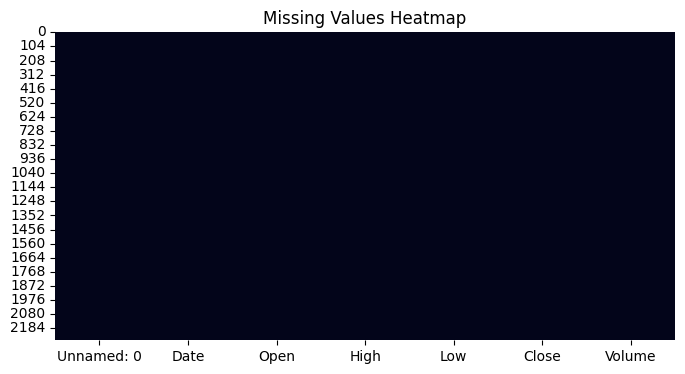

In [14]:
plt.figure(figsize=(8,4))
sns.heatmap(df_raw.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
# plt.savefig("reports/figures/01_missing_heatmap.png", bbox_inches="tight")
# plt.close()

## 4. Drop or impute nulls

In [16]:
# For this dataset, forward-fill then back-fill any remaining
df_clean = df_raw.set_index("Date").ffill().bfill().reset_index()
print("Nulls after fill:")
print(df_clean.isnull().sum())

Nulls after fill:
Date          0
Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64


## 5. Plot closing price time series

In [17]:
plt.figure(figsize=(12,4))
plt.plot(df_clean["Date"], df_clean["Close"], label="Close")
plt.title("Tesla Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.savefig("reports/figures/01_close_timeseries.png", bbox_inches="tight")
plt.close()

## 6. Save cleaned data for next steps

In [18]:
out_path = "data/processed/tesla_cleaned.csv"
df_clean.to_csv(out_path, index=False)
print(f"Cleaned data saved to {out_path}")

Cleaned data saved to data/processed/tesla_cleaned.csv
